# Practical 3: CIFAR-10

This is the second task of Practical 3. Your task is to use **transfer learning** to build a convolutional neural network to tackle the CIFAR-10 dataset (https://www.cs.toronto.edu/~kriz/cifar.html). 
You could select an existing trained model (VGG16 excluded) from Keras (https://keras.io/api/applications/) and fine-tune it to build a classifier for CIFAR-10.

We will mark your code based on the accuracy of your model. 
Your CNN should achieve at least an accuracy of 75% to pass the practical.
You can get 5 or 10 bonus points by achieving an accuracy of 85%+ or 90%+.

You should save and upload your model to the seafile link we provided to you. Please name the model file as `{repository_name}-CIFAR10.h5`. For example, if your repository is FDS21-M0, you should name the model file as `FDS21-M0-CIFAR10.h5`

## Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

In [ ]:
tf.__version__

'2.7.0'

In [ ]:
tf.keras.__version__

'2.7.0'

## Prepare the dataset

In this block, you will prepare the data for the training, such as apply the preprocess function of your selected model and perform data augmentation. 

170508288/170498071 [==============================] - 2s 0us/step


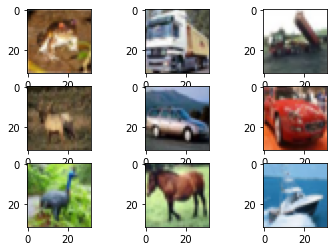

(50000, 32, 32, 3)

In [2]:
from keras.datasets import cifar10
(X_train_full, y_train_full), (X_test, y_test) = cifar10.load_data()

for i in range(0,9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train_full[i])
plt.show()

X_train_full.shape

In [3]:
from keras.applications.densenet import preprocess_input

X_train_full = preprocess_input(X_train_full)
X_test = preprocess_input(X_test)

# one-hot encoding
y_train_full = keras.utils.to_categorical(y_train_full, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

# get validation dataset
np.random.seed(42) # we set the random seed to make sure everytime the data is shuffled in the same way 
shuffled_indices = np.random.permutation(X_train_full.shape[0])
X_valid, X_train = X_train_full[shuffled_indices[:5000]], X_train_full[shuffled_indices[5000:]]
y_valid, y_train = y_train_full[shuffled_indices[:5000]], y_train_full[shuffled_indices[5000:]]

## Build and train the model

Build and train your model. 

In [4]:
# TODO: load the model you selected
inputs = keras.Input(shape=(32, 32, 3))
# upscale layer
upscale = keras.layers.Lambda(lambda x: tf.image.resize_with_pad(x, 160, 160, method=tf.image.ResizeMethod.BILINEAR))(inputs)

base_model = tf.keras.applications.DenseNet169(include_top=False, input_tensor=upscale,
                                        input_shape=(160,160,3),
                                        pooling='max')


# TODO: Transfer learning - build your own model based on the selected model
x = base_model.layers[-3].output
x = keras.layers.Flatten()(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(256,activation='relu')(x) 
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dropout(0.4)(x)
x = keras.layers.Dense(128,activation='relu')(x) 
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dropout(0.3)(x)
output = keras.layers.Dense(units=10, activation='softmax')(x)
model = keras.Model(inputs = base_model.input, outputs = output)

for layer in base_model.layers:
  layer.trainable=False

51888128/51877672 [==============================] - 1s 0us/step


In [5]:
# show the structure of your model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 lambda (Lambda)                (None, 160, 160, 3)  0           ['input_1[0][0]']                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 166, 166, 3)  0          ['lambda[0][0]']                 
                                                                                                  
 conv1/conv (Conv2D)            (None, 80, 80, 64)   9408        ['zero_padding2d[0][0]']         
                                                                                              

In [6]:
model.compile(optimizer=keras.optimizers.Adam(), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [7]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=2, verbose=0,
    mode='auto', baseline=None, restore_best_weights=False)
history = model.fit(X_train_full, y_train_full, batch_size=64, epochs=15, validation_data=(X_valid, y_valid),callbacks=[callback])

Epoch 1/15
782/782 [==============================] - 349s 409ms/step - loss: 0.4031 - accuracy: 0.8672 - val_loss: 0.1608 - val_accuracy: 0.9480
Epoch 2/15
782/782 [==============================] - 308s 394ms/step - loss: 0.2404 - accuracy: 0.9184 - val_loss: 0.0969 - val_accuracy: 0.9682
Epoch 3/15
782/782 [==============================] - 310s 396ms/step - loss: 0.1826 - accuracy: 0.9377 - val_loss: 0.0779 - val_accuracy: 0.9742
Epoch 4/15
782/782 [==============================] - 314s 401ms/step - loss: 0.1505 - accuracy: 0.9475 - val_loss: 0.0523 - val_accuracy: 0.9860
Epoch 5/15
782/782 [==============================] - 311s 398ms/step - loss: 0.1221 - accuracy: 0.9579 - val_loss: 0.0327 - val_accuracy: 0.9904
Epoch 6/15
782/782 [==============================] - 325s 416ms/step - loss: 0.1065 - accuracy: 0.9626 - val_loss: 0.0272 - val_accuracy: 0.9942
Epoch 7/15
782/782 [==============================] - 311s 398ms/step - loss: 0.0900 - accuracy: 0.9678 - val_loss: 0.0243 -

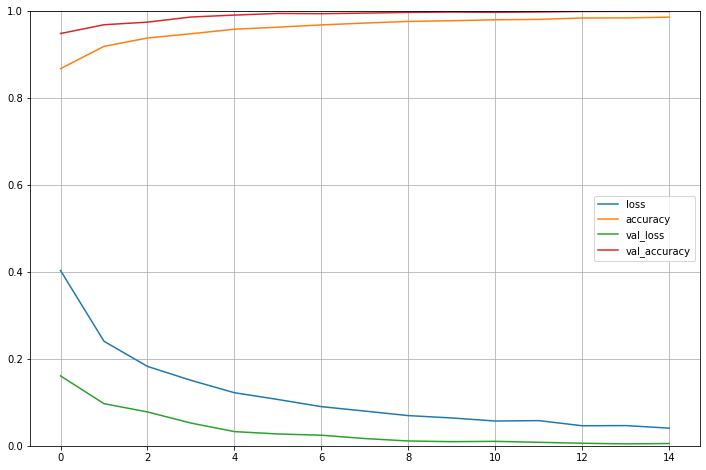

In [9]:
# Assume you have stored the training history in the variable "history"
# Show the learning curves
pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.gca().set_ylim(0, 1)
plt.grid(True)
plt.show()

## Save the model

Save and upload your trained model to the seafile link we provided to you. You can upload it multiple times. We will consider only the newest uploaded model. 

In [10]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [11]:
model.save('FDS21-M62-CIFAR10.h5') # change the file name according to your repository name

## Load the model and evaluate it on the test data

In [12]:
model = keras.models.load_model('FDS21-M62-CIFAR10.h5')
model.evaluate(X_test, y_test)

313/313 [==============================] - 74s 215ms/step - loss: 0.3516 - accuracy: 0.9194


[0.3515636622905731, 0.9193999767303467]

## Short report

Please write a few sentences explaining how you build and train the model. Please include the decisions you made, such as how you decide the number of layers reused from the selected model, and the difficulties you met.

The original image size limited our selections of models due to many models require input image size larger than 71*71, so we decided to apply upscaling. For different model architectures, we tested out Resnet, EfficentNet, MobileNet and DenseNet with their variations and found DenseNet169 with the best performance. For the DenseNet169 Model we first trained it without an upscale of the tensor input. This resulted in an accuracy of around 72%. Changing the image size to match the input and adding a max pooling improved the model performance significantly. But then the validation loss was a bit too high indicating overfitting therefore we included an callback for early stopping which stops training once the model performance stops improving. With this model we are able to achieve an accuracy of 0.92. 